<a href="https://colab.research.google.com/github/fcoelhomrc/MachineLearning/blob/main/TAAPC_Assignments/Assignment1_FilipePatriciaSofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

- Subject: TAAC - Advanced Topics in Machine Learning
- team: 
  - Felipe Coutinho (up201900602@up.pt)
  - Patrícia Rodrigues (up201207162@edu.fe.up.pt)
  - Sofia Malpique (up201704877@up.pt)
- submission deadilne: 6th October 2022

**Evaluation topics:**
- Logistic Regression
- Neural Networks
- Convolution Neural Networks

In [1]:
!python --version

Python 3.7.14


In [2]:
import numpy as np
import pandas as pd
from typing import Tuple

# Visualisations
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Model validation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

## Logistic Regression

### a) Generate the dataset

In [3]:
from sklearn.datasets import make_moons

data, labels = make_moons(n_samples=300, noise=0.2, random_state=123)

print(data.shape, labels.shape)

(300, 2) (300,)


In [4]:
# Data details
print(f"Predictive attributes head: \n{data[:5]}\n...")
print(f"Binary output head: \n{labels[:5]}...")

print(f"% Positive class: {np.sum(labels) / len(labels) * 100:.2f} %")

Predictive attributes head: 
[[ 1.75074061 -0.22859328]
 [-0.70044012  0.02656756]
 [-0.00426155  0.16680829]
 [ 1.83531394  0.02796242]
 [ 2.13267067  0.25420901]]
...
Binary output head: 
[1 0 1 1 1]...
% Positive class: 50.00 %


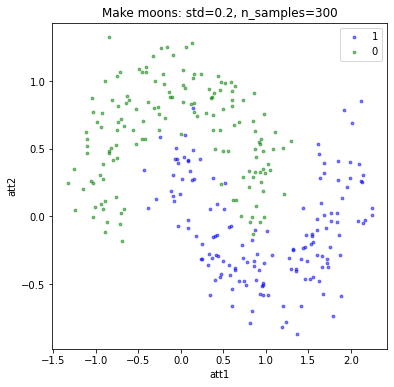

In [5]:
# Visualisation
plt.figure(figsize=(6,6))
plt.scatter(*data[labels==1].T, s=8, alpha=0.5, label="1", color='b')
plt.scatter(*data[labels==0].T, s=8, alpha=0.5, label="0", color='g')
plt.legend()
plt.title('Make moons: std=0.2, n_samples=300')
plt.ylabel('att2')
plt.xlabel('att1')
plt.show()

**Note**: 

This dataset is clearly not linearly separable. Therefore, using a logistic regression algorithm to classify it is bound to give subpar results, since it can only ever generate hyperplanes as decision boundaries.


### b) Train a simple logistic regression model

- training: first 80% of data
- validation: last 20% of data
- report:
  - learning rate
  - perdiction error

In [6]:
# Split the data into training and validation sets
train_val_idx = round(len(data)*0.8)
x_train = data[:train_val_idx]
y_train = labels[:train_val_idx]
x_val = data[train_val_idx:]
y_val = labels[train_val_idx:]

# Access distributions
print(f"PCT training data (attributes or data features) = {len(x_train)/len(data) * 100:.2f}%")
print(f"PCT training data (y) = {len(y_train)/len(labels) * 100:.2f}%")
print(f"PCT validation data (attributes or data features) = {len(x_val)/len(data) * 100:.2f}%")
print(f"PCT validation data (y) = {len(y_val)/len(labels) * 100:.2f}%")

PCT training data (attributes or data features) = 80.00%
PCT training data (y) = 80.00%
PCT validation data (attributes or data features) = 20.00%
PCT validation data (y) = 20.00%


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(solver="liblinear")

parameter_grid = {
    "C": np.logspace(-5, 5, 50),
    "penalty": ["l2"]
}

lr_grid_search = GridSearchCV(estimator=logistic_regression,
                           param_grid=parameter_grid,
                           scoring="accuracy",
                           cv=10)

lr_grid_search.fit(x_train, y_train)  

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [8]:
lr_model = lr_grid_search.best_estimator_
print(lr_grid_search.best_params_)
print(lr_grid_search.best_score_)

{'C': 1.2648552168552958, 'penalty': 'l2'}
0.8208333333333334


In the problem statement, it's asked to explicit the learning rate used. Since the `scikit-learn` LogisticRegression is implemented with an optimization algorithm that employs dynamical learning rate, it is not a tunable hyperparameter and the problem becomes ill-defined.


In [9]:
print(f"Bias added to the decision function: {lr_model.intercept_}")
print(f"Coefficients of the features [att1, att2]: {lr_model.coef_}")

Bias added to the decision function: [0.22058538]
Coefficients of the features [att1, att2]: [[ 1.19979805 -3.38122631]]


In [10]:
def get_conf_matrics_and_report(model, x_val, y_val, n_classes=2,
                                keras_model=False, multiclass=False):
    if keras_model:    
        if multiclass:
            y_pred = np.argmax(model.predict(x_val), axis=-1)
        else:
            y_pred = np.where(model.predict(x_val)>0.5, 1, 0)
    else:
        y_pred = model.predict(x_val)
    
    cm = confusion_matrix(y_val, y_pred, labels=range(0,n_classes))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=range(0,n_classes))
    disp.plot();

    report = classification_report(y_val, y_pred)
    print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



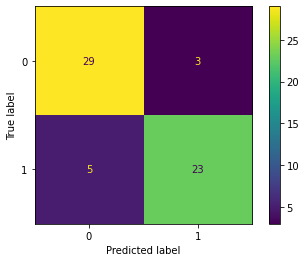

In [11]:
get_conf_matrics_and_report(lr_model, x_val, y_val)

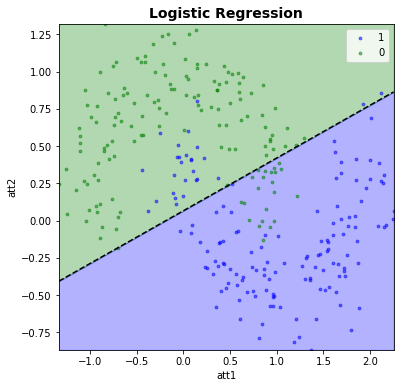

In [12]:
b = lr_model.intercept_
w1, w2 = lr_model.coef_.T
intercept = -b/w2
slope = -w1/w2

# Plot
plt.figure(figsize=(6,6))
# Plot decision boundary
line, = plt.plot([data.min(), data.max()],
                 slope*np.array([data.min(),data.max()]) + intercept,
                 ls="--", color="k")
plt.fill_between(line.get_xdata(),
                 line.get_ydata(), data[:, 1].max()*np.ones(2),
                 color="g", alpha=0.3)
plt.fill_between(line.get_xdata(),
                 data[:, 1].min()*np.ones(2),line.get_ydata(),
                 color="b", alpha=0.3)
# Scatter plot data
plt.scatter(*data[labels==1].T, s=8, alpha=0.5, label="1", color='b')
plt.scatter(*data[labels==0].T, s=8, alpha=0.5, label="0", color='g')
# Plot details
plt.title("Logistic Regression",
          fontsize=14, 
          fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.ylabel('att2')
plt.xlabel('att1')
plt.legend()
plt.show()

### c) Is it possible to build a better solution with this dataset (with LR)?

**Why it does not solve this problem?**

Logistic Regression despite having a non-linear transformation as output, it is a linear algorithm, i.e., it does assume a linear relationship between the input variables with the output. It will try to find the hiperplane that best separate the classes within the training data. This dataset is not linearly separable, thus, it is not able to perform well o this problem.


**How can the problem be solved with LR?**

Given that LR finds the linear relationship between the predictive variables and the output, one option is to convert the non-liner relation into a linear relation. Such techniques are commonly used with SVMs (Support Vector Machines), named as *kernel trick*. This technique consists in transforming the input variables in space, so the algorithm can find the new linear (transformed) relationship between predictive variables and the output. 

## Neural Network

### a) Single Perceptron

In [13]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=123)

parameter_grid = {
    "alpha": np.logspace(-5, 5, 50),
    "penalty": ["l2"]
}

p_grid_search = GridSearchCV(estimator=perceptron,
                           param_grid=parameter_grid,
                           scoring="accuracy",
                           cv=10)

p_grid_search.fit(x_train, y_train)  

GridSearchCV(cv=10, estimator=Perceptron(random_state=123),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [14]:
p_model = p_grid_search.best_estimator_
print(p_grid_search.best_params_)
print(p_grid_search.best_score_)

{'alpha': 0.00016768329368110083, 'penalty': 'l2'}
0.825


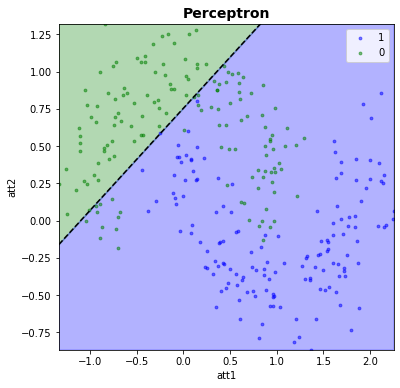

In [15]:
b = p_model.intercept_
w1, w2 = p_model.coef_.T
intercept = -b/w2
slope = -w1/w2

# Plot
plt.figure(figsize=(6,6))
# Plot decision boundary
line, = plt.plot([data.min(), data.max()],
                 slope*np.array([data.min(),data.max()]) + intercept,
                 ls="--", color="k")
plt.fill_between(line.get_xdata(),
                 line.get_ydata(), data[:, 1].max()*np.ones(2),
                 color="g", alpha=0.3)
plt.fill_between(line.get_xdata(),
                 data[:, 1].min()*np.ones(2),line.get_ydata(),
                 color="b", alpha=0.3)
# Scatter plot data
plt.scatter(*data[labels==1].T, s=8, alpha=0.5, label="1", color='b')
plt.scatter(*data[labels==0].T, s=8, alpha=0.5, label="0", color='g')
# Plot details
plt.title("Perceptron",
          fontsize=14, 
          fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.ylabel('att2')
plt.xlabel('att1')
plt.legend()
plt.show()

Compare results obtained with LR and Perceptron:

Results with Logistic Regression (LR):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



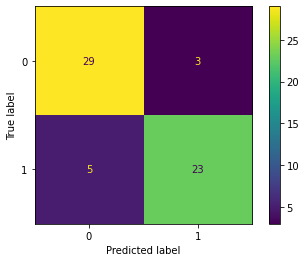

In [16]:
print("Results with Logistic Regression (LR):")
get_conf_matrics_and_report(lr_model, x_val, y_val)

Results with Perceptron:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        32
           1       0.67      1.00      0.80        28

    accuracy                           0.77        60
   macro avg       0.83      0.78      0.76        60
weighted avg       0.84      0.77      0.76        60



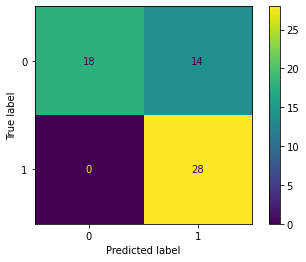

In [17]:
print("Results with Perceptron:")
get_conf_matrics_and_report(p_model, x_val, y_val)

### b) Test the same Single Perceptron with a more challenging dataset

In [18]:
# Functions to help visualise the results
from matplotlib.colors import ListedColormap


def show_errors(model, x_test, y_test):
    y_pred = model.predict(x_val) 
    y_pred_bin = np.squeeze(np.where(y_pred >= 0.5, 1, 0))
    
    test_wrong = np.array([x for x in zip(x_val, y_pred_bin, y_val) if x[1] != x[2]])
    test_right = np.array([x for x in zip(x_val, y_pred_bin, y_val) if x[1] == x[2]])
    
    test_wrong_fp = []
    test_wrong_fn = []
    for x in test_wrong:
      if x[2] == 1:
        test_wrong_fn.append(x)
      else: 
        test_wrong_fp.append(x)
    
    test_wrong_fp = np.squeeze(np.array(test_wrong_fp))
    test_wrong_fn = np.squeeze(np.array(test_wrong_fn))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(*x_val[y_val==1].T, s=8, alpha=1, color='b', marker='o', label='1')
    plt.scatter(*x_val[y_val==0].T, s=8, alpha=1, color='g', marker='o', label='0')
    plt.ylabel('att2')
    plt.xlabel('att1')
    plt.title("Validation Set - Real class")

    plt.subplot(1, 2, 2)
    if len(test_wrong) > 0:
          plt.scatter(x=[x[0] for x in test_wrong[:,0]], y=[x[1] for x in test_wrong[:,0]], color='r', alpha=0.4, marker="x")
    
    plt.scatter(*x_val[y_val==1].T, s=8, alpha=1, color='b', marker='.', label='1')
    plt.scatter(*x_val[y_val==0].T, s=8, alpha=1, color='g', marker='.', label='0')
    plt.ylabel('att2')
    plt.xlabel('att1')
    plt.title("Misclassified examples")
    
    plt.tight_layout()
    plt.show()


def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.winter
    cm_bright = ListedColormap(['#21B6A8', '#0000CC'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

In [19]:
from sklearn.datasets import make_circles


data_set: Tuple[np.ndarray] = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=0)
x = data_set[0]
y = data_set[1]


In [20]:
# Split the data into training and validation sets
train_val_idx = round(len(data)*0.8)
x_train = x[:train_val_idx]
y_train = y[:train_val_idx]
x_val = x[train_val_idx:]
y_val = y[train_val_idx:]

# Assess distributions
print(f"PCT training data (attributes or data features) = {len(x_train)/len(x) * 100:.2f}%")
print(f"PCT training data (y) = {len(y_train)/len(y) * 100:.2f}%")
print(f"PCT validation data (attributes or data features) = {len(x_val)/len(x) * 100:.2f}%")
print(f"PCT validation data (y) = {len(y_val)/len(y) * 100:.2f}%")

PCT training data (attributes or data features) = 80.00%
PCT training data (y) = 80.00%
PCT validation data (attributes or data features) = 20.00%
PCT validation data (y) = 20.00%


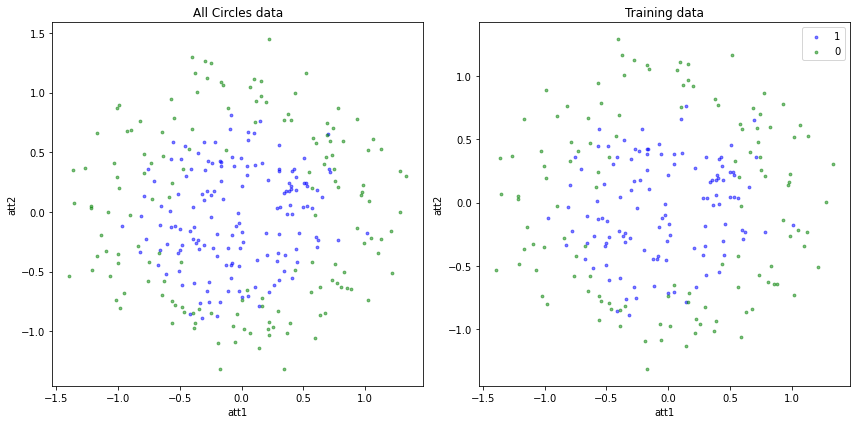

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(*x[y==1].T, s=8, alpha=0.5, color='b', label='1')
plt.scatter(*x[y==0].T, s=8, alpha=0.5, color='g', label='0')
plt.ylabel('att2')
plt.xlabel('att1')
plt.title('All Circles data')
plt.subplot(1, 2, 2)
plt.scatter(*x_train[y_train==1].T, s=8, alpha=0.5, color='b', label='1')
plt.scatter(*x_train[y_train==0].T, s=8, alpha=0.5, color='g', label='0')
plt.ylabel('att2')
plt.xlabel('att1')
plt.title('Training data')
plt.legend()
plt.tight_layout()
plt.show()

The `factor` parameter in `make_circles` control how separated the circles are. If left as default (`factor = 0.8`), they are essentially overlapped and classification would become hard. Even by making the circles clearly separated, we can expect the Perceptron to perform poorly since this dataset remains not linearly separable.

In [22]:
p_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(random_state=123),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [23]:
p_model = p_grid_search.best_estimator_
print(p_grid_search.best_params_)
print(p_grid_search.best_score_)

{'alpha': 0.0006866488450042998, 'penalty': 'l2'}
0.5375


Results with Perceptron on the circle data
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        28
           1       0.52      0.47      0.49        32

    accuracy                           0.48        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.49      0.48      0.48        60



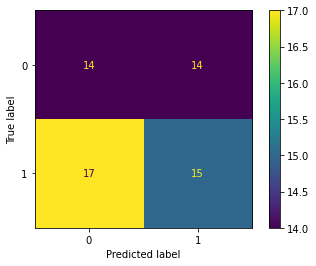

In [24]:
print("Results with Perceptron on the circle data")
get_conf_matrics_and_report(p_model, x_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


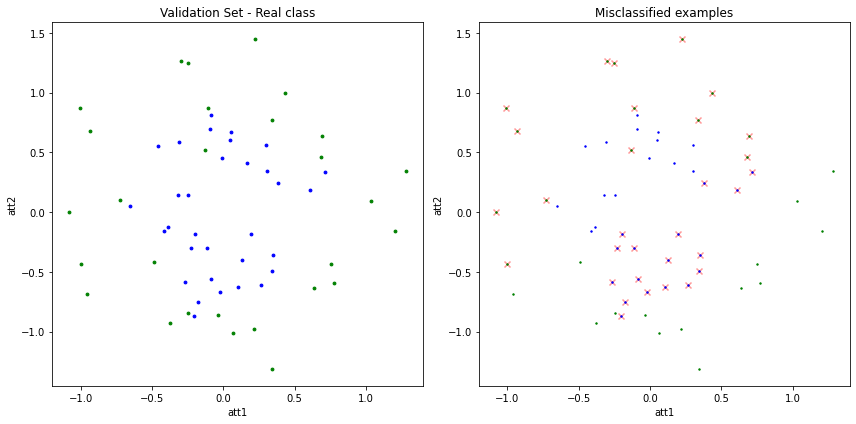

In [25]:
show_errors(p_model, x_val, y_val)

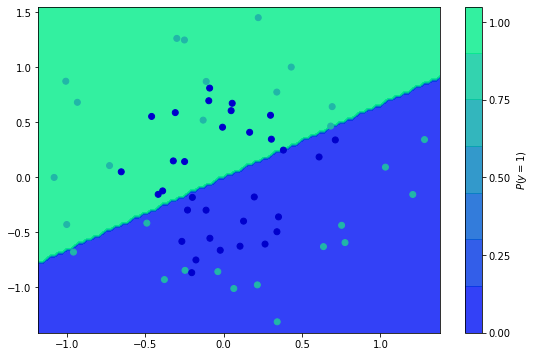

In [26]:
plot_decision_boundary(lambda x: p_model.predict(x), x_val, y_val)

The performance has significantly dropped, comparing to the moon dataset. Again, this was to be expected since by drawing a line, the best one can hope to achieve is to correctly classify half the points in each circle. Indeed, we have an accuracy of about 50%.

Of course, the correct way to approach this problem is by introducing non-linearity in our classifiers. This can be done building up from the Perceptron model. Indeed, the Multi-Layer Perceptron is your staple Neural Network. 
 

### c) Complex Model based on NN

In [27]:
# Functions to help visualise the results

def plot_training_history(history):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='gray', label='test')

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='orange', label='train')
    plt.plot(history.history['val_accuracy'], color='gray', label='test')

    plt.tight_layout()
    plt.legend()
    plt.show()

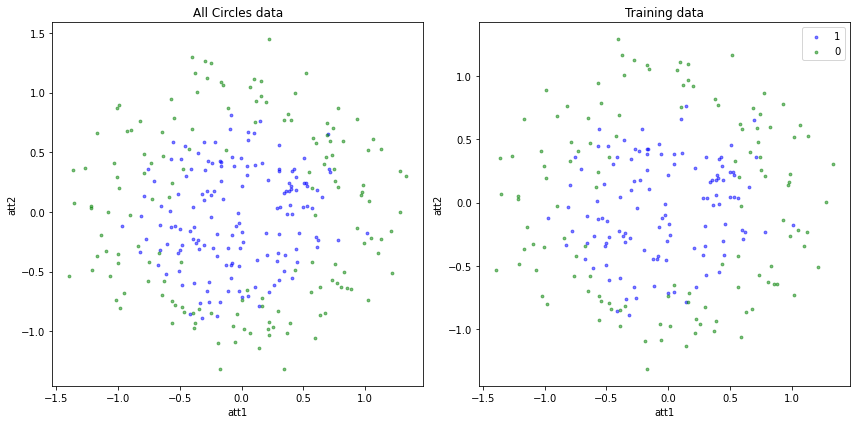

In [28]:
# Recalling the data

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(*x[y==1].T, s=8, alpha=0.5, color='b', label='1')
plt.scatter(*x[y==0].T, s=8, alpha=0.5, color='g', label='0')
plt.ylabel('att2')
plt.xlabel('att1')
plt.title('All Circles data')
plt.subplot(1, 2, 2)
plt.scatter(*x_train[y_train==1].T, s=8, alpha=0.5, color='b', label='1')
plt.scatter(*x_train[y_train==0].T, s=8, alpha=0.5, color='g', label='0')
plt.ylabel('att2')
plt.xlabel('att1')
plt.title('Training data')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
import tensorflow as tf


# Fixing seeds
np.random.seed(1)
tf.random.set_seed(1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


nn_model = Sequential()
nn_model.add(Dense(3, input_shape=(2,), kernel_initializer='uniform', activation='tanh'))
nn_model.add(Dense(2, kernel_initializer='uniform', activation='tanh'))
nn_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [31]:
# training the NN
n_epochs = 100
batch_size = round(len(x_train) / 2)
print(batch_size)
history = nn_model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.1)


120
Epoch 1/100
2/2 [==============================] - 5s 171ms/step - loss: 0.6945 - accuracy: 0.5046 - val_loss: 0.6899 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6966 - val_accuracy: 0.4167
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.4583
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.6933 - accuracy: 0.5093 - val_loss: 0.6983 - val_accuracy: 0.5417
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 0.6935 - accuracy: 0.5370 - val_loss: 0.7026 - val_accuracy: 0.5417
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.6909 - accuracy: 0.5556 - val_loss: 0.6986 - val_accuracy: 0.5833
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 0.6894 - accuracy: 0.5324 - val_loss: 0.6959 - val_accuracy: 0.5417
Epoch 8/100
2/2

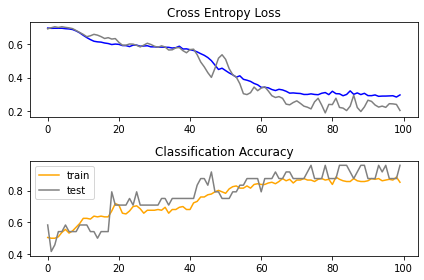

In [32]:
plot_training_history(history)

Results with MLP on the circle data - Training Data
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       122
           1       0.88      0.84      0.86       118

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



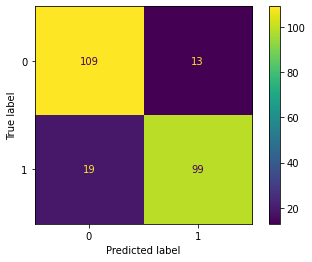

In [33]:
print("Results with MLP on the circle data - Training Data")
get_conf_matrics_and_report(nn_model, x_train, y_train, keras_model=True)

Results with MLP on the circle data - Validation Data
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.90      0.88      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



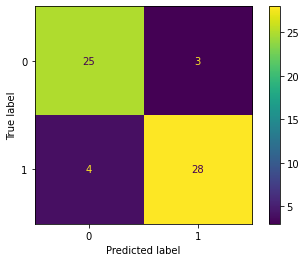

In [34]:
print("Results with MLP on the circle data - Validation Data")
get_conf_matrics_and_report(nn_model, x_val, y_val, keras_model=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


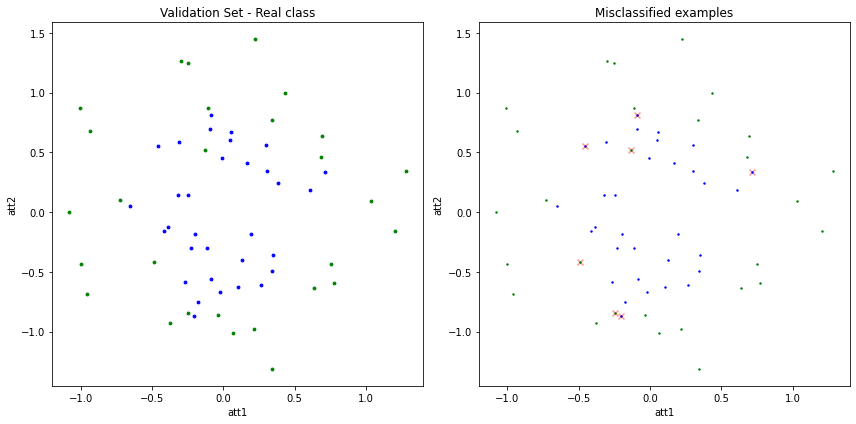

In [35]:
show_errors(nn_model, x_val, y_val)

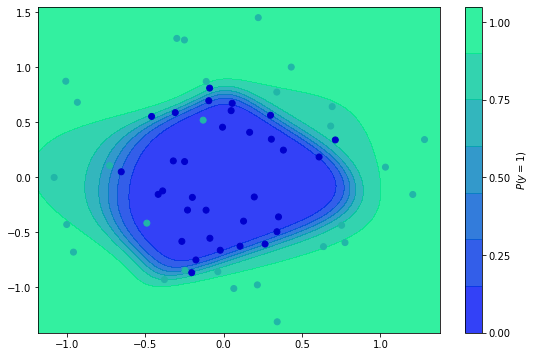

In [36]:
plot_decision_boundary(lambda x: 1- nn_model.predict(x), x_val, y_val)

As we can see, such model is capable of finding a non-linear decision boundary that separates rather well the circle dataset.

**Why?**

The idea is to connect the output of a layer of many perceptrons (which we shall now call an unit) to the input of another layer of units. If this connection was direct, the resulting model would remain linear since all operations involved would still amount to addition and multiplication. Rather, we feed the output of each unit into a non-linear activation function, and only then we pass the result to the next layer. 

In this model, as with a single Perceptron, the training still consists of finding optimal parameters for an affine transform. But, since we added non-linearity, the resulting model has the capabilities of an universal function approximator.

**More intuition about the selected hyperparameters:**
A single perceptron can only solve a linear separable problem. However, when we start stacking and layering several perceptrons, with learnable activation functions and enought data, the model starts to be able to understand the non linearity of the classes. 

In this case, we are using 2 layers: 
- 1st with **3 nodes**: this will pick the 2 dimensions of each point, and find the relation in a 3D space. In theory, 3 dimensions would be enought to find the separation to help to identify better the linear relationship between the 2 classes.
- 2nd with **2 nodes**: the 2 notes will bring back the 3 dimensions to 2 again, but now with the transformation in a way the problem is linear separable - so they are no longer circunferencial cicles. 
- last with **1 node** (with `sigmoid` to provide the output result [0, 1]) [source](https://sizhky.github.io/posts/2017/11/neural-network-transformations.html)

This method can also be called **Kernel Trick** - commonly applied side by side with SVM models.

We have tested a minimal solution in terms of number of parameters used. If we didn't have the geometrical insight, we could simply try using a network with more units per layer, for example. We would then risk overfitting, and in that case, we would need to tune the number of units per layer / the number of layers / add regularization techniques such as dropout layers.

In [37]:
input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
flatten_ = tf.keras.layers.Flatten()(input_)
layer1 = tf.keras.layers.Dense(256, activation="relu")(flatten_)
layer2 = tf.keras.layers.Dense(256, activation="relu")(layer1)
output = tf.keras.layers.Dense(1, activation="sigmoid")(layer2) 

nn_model = tf.keras.Model(inputs=[input_], outputs=[output])

In [38]:
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)

In [39]:
history = nn_model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/100
2/2 [==============================] - 1s 158ms/step - loss: 0.6898 - accuracy: 0.4907 - val_loss: 0.5887 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6293 - accuracy: 0.5185 - val_loss: 0.5776 - val_accuracy: 0.7083
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.5873 - accuracy: 0.7083 - val_loss: 0.5350 - val_accuracy: 0.7917
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.5346 - accuracy: 0.8148 - val_loss: 0.4766 - val_accuracy: 0.8333
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.4838 - accuracy: 0.8194 - val_loss: 0.4154 - val_accuracy: 0.8333
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.4274 - accuracy: 0.8472 - val_loss: 0.3222 - val_accuracy: 0.9583
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3836 - accuracy: 0.8611 - val_loss: 0.2653 - val_accuracy: 0.9583
Epoch 8/100
2/2 [==

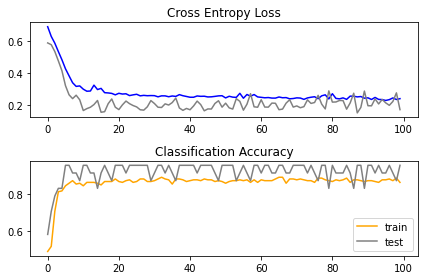

In [40]:
plot_training_history(history)

Results with MLP on the circle data - Validation Data
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



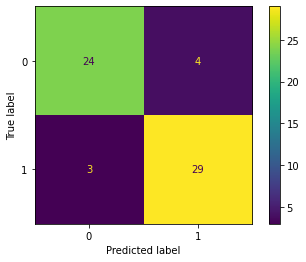

In [41]:
print("Results with MLP on the circle data - Validation Data")
get_conf_matrics_and_report(nn_model, x_val, y_val, keras_model=True)

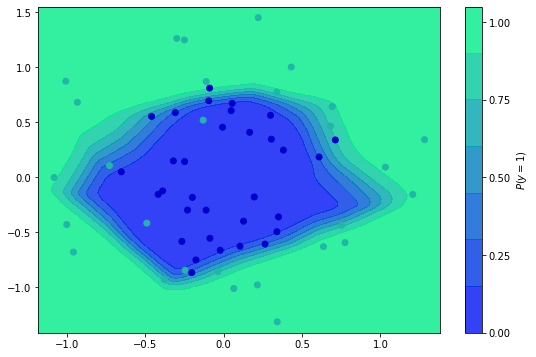

In [42]:
plot_decision_boundary(lambda x: 1- nn_model.predict(x), x_val, y_val)

## Convolutional Neural Networks

### a) What's the input dimension of the final block (orange)? How many trainable parameters does this model have?

In [43]:
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


width, height, channels = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(f"width: {width}, height: {height}, channels: {channels}")

print("Verify normalisation of the predictive attributes:")
print('max', x_train[0].max())
print('min', x_train[0].min())

170508288/170498071 [==============================] - 14s 0us/step
width: 32, height: 32, channels: 3
Verify normalisation of the predictive attributes:
max 1.0
min 0.0


In [44]:
# helper functions
import math


def add_padding(dim):
    return dim + 2*1


def get_out_dimension(dim_input, dim_filter):
    return dim_input - dim_filter + 1


def print_output_shape(name, dim_out, n_filters):
    print(f"Shape of {name} block is {dim_out} x {dim_out} x {n_filters}")

In [45]:
# Calculation of the dimensions throught the network
# Original input
dim_original = 32

# Blue block
n_filters_blue = 64
## 1st
dim_out_blue_1 = get_out_dimension(add_padding(dim_original), 3)
print_output_shape('1st blue', dim_out_blue_1, n_filters_blue)
## 2nd
dim_out_blue_2 = get_out_dimension(add_padding(dim_out_blue_1), 3)
print_output_shape('2nd blue', dim_out_blue_2, n_filters_blue)

# 1st Polling / 2
dim_out_poll_1 = math.floor(dim_out_blue_2 / 2)
print_output_shape('1st pooling', dim_out_poll_1, n_filters_blue)

# Green block
n_filters_green = 128
## 1st
dim_out_green_1 = get_out_dimension(add_padding(dim_out_poll_1), 3)
print_output_shape('1st green', dim_out_green_1, n_filters_green)
## 2nd
dim_out_green_2 = get_out_dimension(add_padding(dim_out_green_1), 3)
print_output_shape('2nd green', dim_out_green_2, n_filters_green)

# 2nd Polling / 2
dim_out_poll_2 = math.floor(dim_out_green_2 / 2)
print_output_shape('2nd pooling', dim_out_poll_2, n_filters_green)

# flatten
dim_flat = dim_out_poll_2 * dim_out_poll_2 * n_filters_green
print(f"Flattened dimension is: {dim_flat} (input of the orange block)")

Shape of 1st blue block is 32 x 32 x 64
Shape of 2nd blue block is 32 x 32 x 64
Shape of 1st pooling block is 16 x 16 x 64
Shape of 1st green block is 16 x 16 x 128
Shape of 2nd green block is 16 x 16 x 128
Shape of 2nd pooling block is 8 x 8 x 128
Flattened dimension is: 8192 (input of the orange block)


In [46]:
def calculate_parameters_for_conv(prev_n_filters, dim_filter, n_bias, new_n_filters):
    return (prev_n_filters * dim_filter * dim_filter + n_bias) * new_n_filters


def calculate_parameters_for_fc(current_layer_neurons, previous_layer_neurons):
    return (current_layer_neurons * previous_layer_neurons) + current_layer_neurons

In [47]:
# Calculation of the learning parameters throught the network
# Original input
n_channels = x_train.shape[3]

# Blue block
## 1st
total_param_blue1 = calculate_parameters_for_conv(
    prev_n_filters=n_channels, 
    dim_filter=3, 
    n_bias=1, 
    new_n_filters=n_filters_blue)
print(f"Total parameters in 1st blue: {total_param_blue1:,}")
## 2nd
total_param_blue2 = calculate_parameters_for_conv(
    prev_n_filters=n_filters_blue, 
    dim_filter=3, 
    n_bias=1, 
    new_n_filters=n_filters_blue)
print(f"Total parameters in 2nd blue: {total_param_blue2:,}")

# Pooling does not have learning parameters

# Green block
## 1st
total_param_green1 = calculate_parameters_for_conv(
    prev_n_filters=n_filters_blue, 
    dim_filter=3, 
    n_bias=1, 
    new_n_filters=n_filters_green)
print(f"Total parameters in 1st green: {total_param_green1:,}")
## 2nd
total_param_green2 = calculate_parameters_for_conv(
    prev_n_filters=n_filters_green, 
    dim_filter=3, 
    n_bias=1, 
    new_n_filters=n_filters_green)
print(f"Total parameters in 2nd green: {total_param_green2:,}")


# Orange block
## 1st FC
total_param_orange1 = calculate_parameters_for_fc(1024, dim_flat)
print(f"Total parameters in 1st orange: {total_param_orange1:,}")
## 2nd FC
total_param_orange2 = calculate_parameters_for_fc(1024, 1024)
print(f"Total parameters in 2nd orange: {total_param_orange2:,}")
## 3rd FC
total_param_orange3 = calculate_parameters_for_fc(10, 1024)
print(f"Total parameters in 3rd orange: {total_param_orange3:,}")

# Summing everything
print(f"Total trainable parameters: {total_param_blue1 + total_param_blue2 + total_param_green1 + total_param_green2 + total_param_orange1 + total_param_orange2 + total_param_orange3:,}")


Total parameters in 1st blue: 1,792
Total parameters in 2nd blue: 36,928
Total parameters in 1st green: 73,856
Total parameters in 2nd green: 147,584
Total parameters in 1st orange: 8,389,632
Total parameters in 2nd orange: 1,049,600
Total parameters in 3rd orange: 10,250
Total trainable parameters: 9,709,642


### b) Implement this CNN, train it and evaluate it

In [48]:
print("Verify the balance of the 10 labels:")
# # of present classes - label distribution
print(f"airplane #: {sum(np.where(y_train==0, 1, 0))}")
print(f"automobile #: {sum(np.where(y_train==1, 1, 0))}")
print(f"bird #: {sum(np.where(y_train==2, 1, 0))}")
print(f"cat #: {sum(np.where(y_train==3, 1, 0))}")
print(f"deer #: {sum(np.where(y_train==4, 1, 0))}")
print(f"dog #: {sum(np.where(y_train==5, 1, 0))}")
print(f"frog #: {sum(np.where(y_train==6, 1, 0))}")
print(f"horse #: {sum(np.where(y_train==7, 1, 0))}")
print(f"ship #: {sum(np.where(y_train==8, 1, 0))}")
print(f"truck #: {sum(np.where(y_train==9, 1, 0))}")

Verify the balance of the 10 labels:
airplane #: [5000]
automobile #: [5000]
bird #: [5000]
cat #: [5000]
deer #: [5000]
dog #: [5000]
frog #: [5000]
horse #: [5000]
ship #: [5000]
truck #: [5000]


**Note**: The classes are well balanced, thus we can use accuracy based metrics

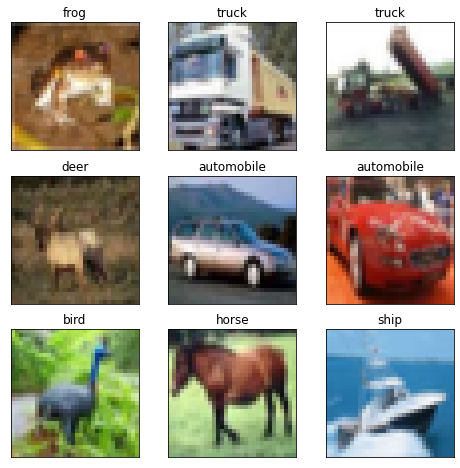

In [49]:
# See some samples of the data
label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i],)
    plt.title(label_dict.get(y_train[i][0]))
    plt.xticks([]), plt.yticks([])

In [50]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers
from keras.metrics import AUC


cnn_model = Sequential()

cnn_model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3),
    padding="same", 
    activation='relu', 
    use_bias=True, 
    bias_initializer=initializers.Zeros(), 
    input_shape=(width, height, channels)))
cnn_model.add(Conv2D(filters=64, 
    kernel_size=(3, 3), 
    padding="same", 
    activation='relu', 
    use_bias=True,
    bias_initializer=initializers.Zeros()))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), 
    strides=None, 
    padding="valid"))
cnn_model.add(Conv2D(filters=128, 
    kernel_size=(3, 3), 
    padding="same",
    activation='relu', 
    use_bias=True, 
    bias_initializer=initializers.Zeros()))
cnn_model.add(Conv2D(filters=128, 
    kernel_size=(3, 3), 
    padding="same",
    activation='relu', 
    use_bias=True, 
    bias_initializer=initializers.Zeros()))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), 
    strides=None, padding="valid"))
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [51]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [52]:
from keras.callbacks import EarlyStopping

# Define early stopping:
early_stopping_cb = EarlyStopping(min_delta=1e-4, patience=5)

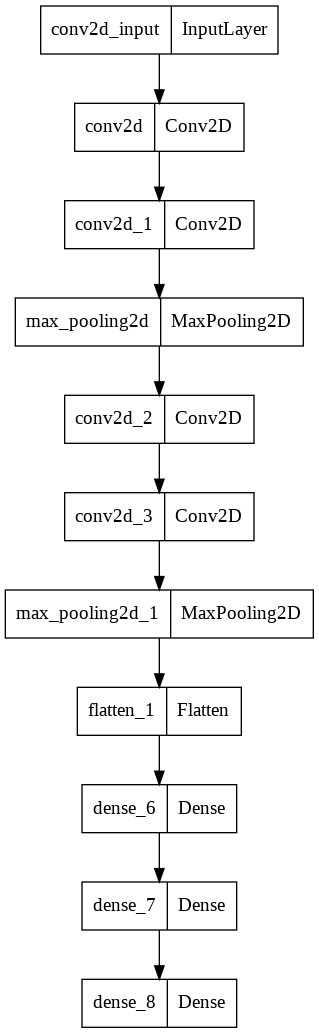

In [53]:
tf.keras.utils.plot_model(cnn_model) 

In [54]:
n_epochs = 10
batch_size = 32

cnn_history = cnn_model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=n_epochs,
                    callbacks=[early_stopping_cb],
                    validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 18s 8ms/step - loss: 1.9575 - accuracy: 0.2963 - val_loss: 1.7714 - val_accuracy: 0.3666
Epoch 2/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5543 - accuracy: 0.4457 - val_loss: 1.5745 - val_accuracy: 0.4270
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3535 - accuracy: 0.5187 - val_loss: 1.3452 - val_accuracy: 0.5212
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2180 - accuracy: 0.5662 - val_loss: 1.2611 - val_accuracy: 0.5550
Epoch 5/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.0958 - accuracy: 0.6114 - val_loss: 1.2115 - val_accuracy: 0.5768
Epoch 6/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9792 - accuracy: 0.6524 - val_loss: 1.1301 - val_accuracy: 0.6096
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8614 - accuracy: 0.6983 - val_loss: 1.0260 - val_ac

In [55]:
# Evaluate the model in the train set - check for overfitting
cnn_model.evaluate(x_train, y_train)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4506 - accuracy: 0.8507


[0.4505871534347534, 0.8507199883460999]

In [56]:
# Evaluate the model in the test set
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2079 - accuracy: 0.6385


[1.2079070806503296, 0.6384999752044678]

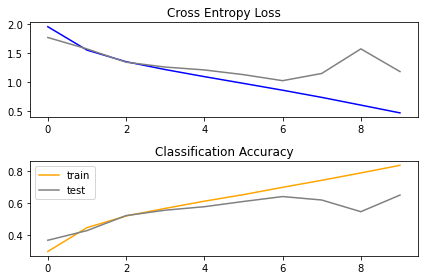

In [57]:
plot_training_history(cnn_history)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.87      0.64      0.74      1000
           2       0.45      0.66      0.54      1000
           3       0.48      0.43      0.45      1000
           4       0.58      0.55      0.56      1000
           5       0.59      0.49      0.54      1000
           6       0.60      0.79      0.69      1000
           7       0.83      0.60      0.70      1000
           8       0.74      0.79      0.76      1000
           9       0.72      0.73      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



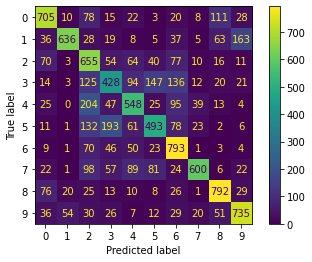

In [58]:
get_conf_matrics_and_report(cnn_model, x_test, y_test, n_classes=10,
                            keras_model=True, multiclass=True)

From the history plot, it seems like our model is overfitting our data since the validation loss is systematically higher than the training loss.

Also, looking at our confusion matrix, we can see that the model really struggles with classes 3 through 7, and tends to mix up pairs of classes (e.g class 0 and class 8).

### c) Propose an architecture


The resolution of the input images are: 
256 x 256 x 3

In [59]:
from tensorflow.keras import initializers
from keras.metrics import AUC


imnet_model = Sequential()
imnet_model.add(Conv2D( filters=64, kernel_size=(3, 3), padding="same", activation='relu', use_bias=True, bias_initializer=initializers.Zeros(), input_shape=(256, 256, 3)))
imnet_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu', use_bias=True,bias_initializer=initializers.Zeros()))
imnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
imnet_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
imnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
imnet_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
imnet_model.add(Conv2D(filters=1024, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(Conv2D(filters=1024, kernel_size=(3, 3), padding="same",activation='relu', use_bias=True, bias_initializer=initializers.Zeros()))
imnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
imnet_model.add(Flatten())
imnet_model.add(Dense(2048, activation='relu'))
imnet_model.add(Dense(1024, activation='relu'))
imnet_model.add(Dense(1000, activation='softmax'))
imnet_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [60]:
imnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                  

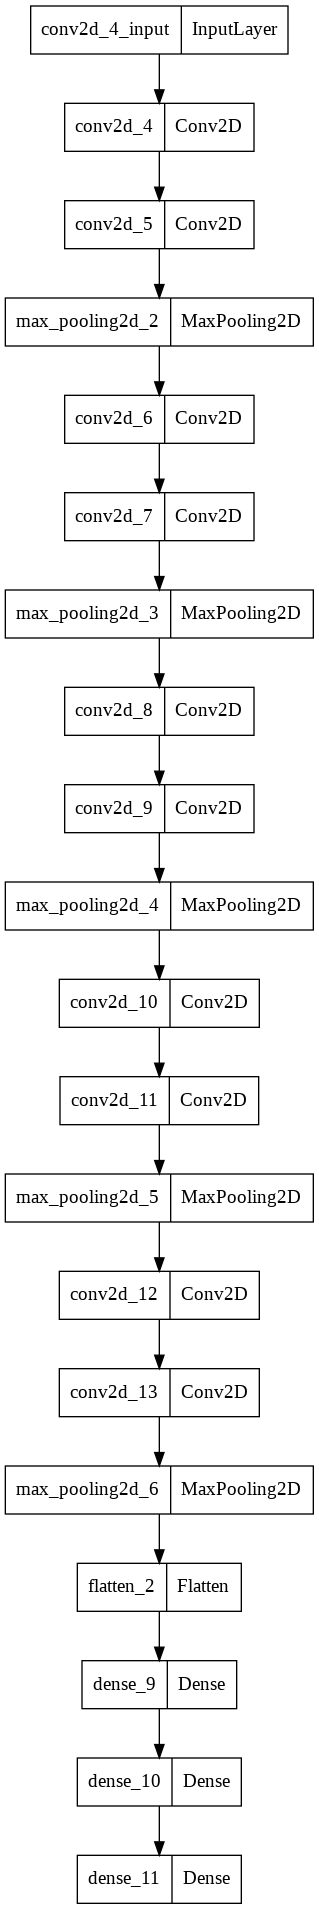

In [61]:
tf.keras.utils.plot_model(imnet_model) 

**Option A**

Use a pre-trained model, i.e transfer learning. If we try to train a model from randomly initialized weights, we will need much more data since it will need to learn how to extract useful features from images first. A much more efficient approach would to pre-train / reuse trained models in image related tasks, with the belief that they will be capable of generating these features beforehand. Then, our model would only need to learn how to use those features to perform its given task, reducing the amount of data and training required.

**Option B** Using similar architecture as presented above `imnet_model`:

These images have higher resolution. 3 by 3 pixels will get very little information from them - we say it will only get higher frequencies of the image. If we want to get more visually understandable information (lower frequencies) we need to increase de depth of the network, by adding more connected convolution layers, with the same 3 by 3 

The number of filters are going as 2 times the previous layer. 

At the end of the last polling we will get the same 8x8 image resolution (as in previous slide).

To finish the architecture, there are 4 dense layers, with decrease number of filters, so we can start tuning towards the number of classes - ending with 1000 (number of classes)

**Option C**

Popular CNN architectures:
- VGG16 (2014):
  - 16 layers with weigths 
    - 13 of them are convolutional
    - 3 are dense and fully connected
    - 4 max-pooling layers
- InceptionNet (2014):
  - Inseption model with several concolutional layeyrs and one max pooling. 
- ResNets (2015):
- NFNets (2021):
- Efficient Nets (2021):

[resource](https://www.baeldung.com/cs/deep-cnn-design)


**Option D**
- If we notice that our model starts overfitting (as seems to be the case with CIFAR10), we can add regularization layers. A common practice is to follow each layer by Batch Normalization layers, in order to keep their outputs variance contained and allow for better gradient flow during backpropagation.
